# [Agglomerative聚类](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

## 0. 加载相关模块

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from agg_vis_util import plot_dendrogram

%matplotlib inline

## 1. 加载数据

In [3]:
data_file = './dataset/zoo.csv'
data_df = pd.read_csv(data_file)

### 1.1 查看数据集

In [4]:
# 数据大小
data_df.shape

(101, 18)

In [5]:
# 列名
data_df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [6]:
data_df.head()

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3           1  
4           1

/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class_type', ylabel='count'>

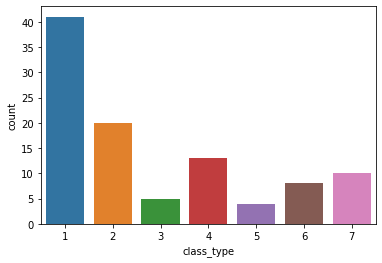

In [7]:
# 类别分布
sns.countplot(data_df['class_type'])

## 2. 特征处理 

In [9]:
# 数值型特征
numeric_cols = ['legs']
# 其他特征
other_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 
                  'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 
                  'venomous', 'fins', 'tail', 'domestic', 'catsize'] 

In [10]:
# 将数值型特征归一化到0-1
scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(data_df[numeric_cols])

other_features = data_df[other_cols]

In [11]:
# 合并两个类型的特征
all_features = np.hstack((numeric_features, other_features))
all_features.shape

(101, 16)

## 3. 聚类分析

In [12]:
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters = agg_cluster.fit(all_features)

In [13]:
# 聚类结果
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

## 4. 聚类结果可视化

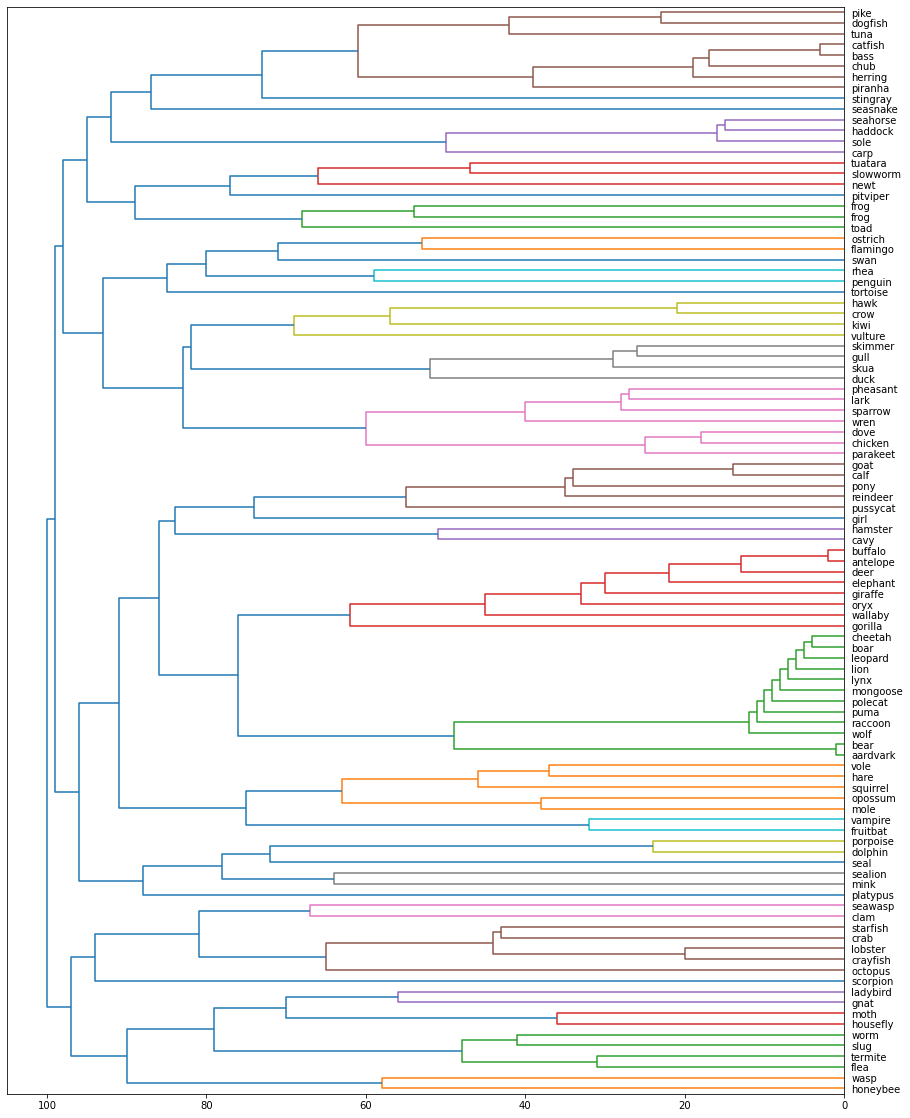

In [14]:
names = data_df['animal_name']

fig = plt.figure(figsize=(15, 20))
plot_dendrogram(clusters, orientation='left', leaf_label_func=lambda x: names[x], leaf_font_size=10)
plt.show()